In [1]:
    #!git clone https://github.com/Namanj1298/Training-Data-Track-1
    #!git clone https://github.com/rslim087a/track
    
    #!ls Training-Data-Track-1
    #!ls track

    #!pip3 install imgaug
    
    #!pip3 install keras
    #!pip3 install tensorflow
    
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import keras
    from keras.models import load_model
    from keras.models import Sequential
    from keras.optimizers import Adam
    from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
    from sklearn.utils import shuffle
    from sklearn.model_selection import train_test_split
    from imgaug import augmenters as iaa
    import cv2
    import pandas as pd
    import ntpath
    import random

Using TensorFlow backend.
D:\Software Setups\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Software Setups\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Software Setups\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Software Setups\Anaconda3\envs\k

In [2]:
    datadir = 'Training-Data-Track-1'
    #datadir = 'track'
    columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
    data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
    pd.set_option('display.max_colwidth', -1)
    data.head()

D:\Software Setups\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


center  \
0  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\center_2020_09_07_08_02_24_431.jpg   
1  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\center_2020_09_07_08_02_24_505.jpg   
2  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\center_2020_09_07_08_02_24_577.jpg   
3  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\center_2020_09_07_08_02_24_651.jpg   
4  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\center_2020_09_07_08_02_24_725.jpg   

                                                                                                        left  \
0  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\left_2020_09_07_08_02_24_431.jpg   
1  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\left_2020_09_07_08_02_24_505.jpg   
2  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\left_2020_09_07_08_02_24_577.jpg   
3  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\left_2020_09_07_08_02_24_651.jpg   
4  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\left_2020_09_07_08_02_24_725.jpg   

                                                                                                        right  \
0  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\right_2020_09_07_08_02_24_431.jpg   
1  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\right_2020_09_07_08_02_24_505.jpg   
2  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\right_2020_09_07_08_02_24_577.jpg   
3  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\right_2020_09_07_08_02_24_651.jpg   
4  C:\Users\hp\Desktop\Machine Learning\Udemy Course\Behavioral Cloning\IMG\right_2020_09_07_08_02_24_725.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.767970  0        2.277507  
1  0.0       0.992315  0        2.935356  
2  0.0       1.000000  0        3.877366  
3  0.0       1.000000  0        4.812605  
4  0.0       1.000000  0        5.508644

In [3]:
    def path_leaf(path):
      head, tail = ntpath.split(path)
      return tail
    data['center'] = data['center'].apply(path_leaf)
    data['left'] = data['left'].apply(path_leaf)
    data['right'] = data['right'].apply(path_leaf)
    data.head()

center                              left  \
0  center_2020_09_07_08_02_24_431.jpg  left_2020_09_07_08_02_24_431.jpg   
1  center_2020_09_07_08_02_24_505.jpg  left_2020_09_07_08_02_24_505.jpg   
2  center_2020_09_07_08_02_24_577.jpg  left_2020_09_07_08_02_24_577.jpg   
3  center_2020_09_07_08_02_24_651.jpg  left_2020_09_07_08_02_24_651.jpg   
4  center_2020_09_07_08_02_24_725.jpg  left_2020_09_07_08_02_24_725.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2020_09_07_08_02_24_431.jpg  0.0       0.767970  0        2.277507  
1  right_2020_09_07_08_02_24_505.jpg  0.0       0.992315  0        2.935356  
2  right_2020_09_07_08_02_24_577.jpg  0.0       1.000000  0        3.877366  
3  right_2020_09_07_08_02_24_651.jpg  0.0       1.000000  0        4.812605  
4  right_2020_09_07_08_02_24_725.jpg  0.0       1.000000  0        5.508644

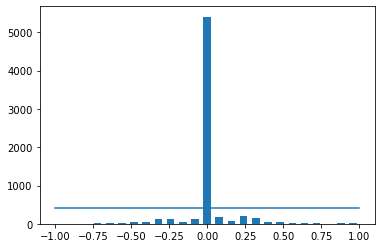

In [4]:
    num_bins = 25
    samples_per_bin = 400
    hist, bins = np.histogram(data['steering'], num_bins)
    center = (bins[:-1]+ bins[1:]) * 0.5
    plt.bar(center, hist, width=0.05)
    plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 6754
removed: 5009
remaining: 1745


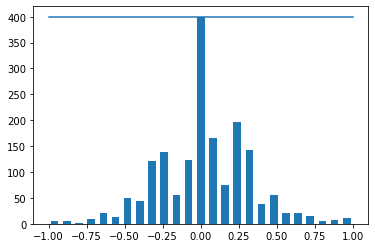

In [5]:
    print('total data:', len(data))
    remove_list = []
    for j in range(num_bins):
      list_ = []
      for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
          list_.append(i)
      list_ = shuffle(list_)
      list_ = list_[samples_per_bin:]
      remove_list.extend(list_)
     
    print('removed:', len(remove_list))
    data.drop(data.index[remove_list], inplace=True)
    print('remaining:', len(data))
     
    hist, _ = np.histogram(data['steering'], (num_bins))
    plt.bar(center, hist, width=0.05)
    plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [6]:
    print(data.iloc[1])
    def load_img_steering(datadir, df):
      image_path = []
      steering = []
      for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        # left image append
        image_path.append(os.path.join(datadir,left.strip()))
        steering.append(float(indexed_data[3])+0.15)
        # right image append
        image_path.append(os.path.join(datadir,right.strip()))
        steering.append(float(indexed_data[3])-0.15)
      image_paths = np.asarray(image_path)
      steerings = np.asarray(steering)
      return image_paths, steerings
     
    image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2020_09_07_08_02_25_748.jpg
left        left_2020_09_07_08_02_25_748.jpg  
right       right_2020_09_07_08_02_25_748.jpg 
steering   -0.4                               
throttle    1                                 
reverse     0                                 
speed       16.7737                           
Name: 18, dtype: object


In [7]:
    X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
    print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 4188
Valid Samples: 1047


Text(0.5, 1.0, 'Validation set')

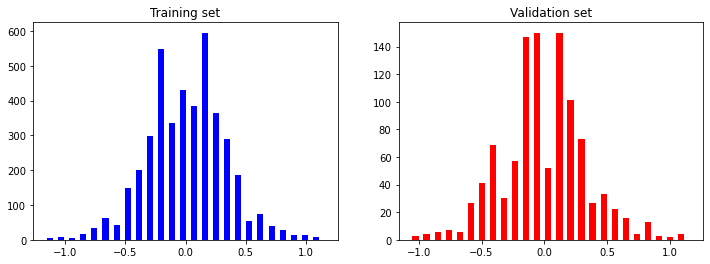

In [8]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
    axes[0].set_title('Training set')
    axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
    axes[1].set_title('Validation set')   

In [9]:
    def zoom(image):
      zoom = iaa.Affine(scale=(1, 1.3))
      image = zoom.augment_image(image)
      return image

Text(0.5, 1.0, 'Zoomed Image')

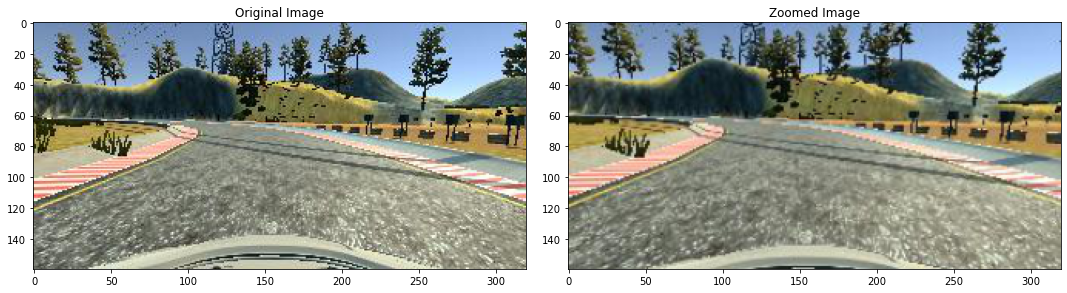

In [10]:
    image = image_paths[random.randint(0, 1000)]
    original_image = mpimg.imread(image)
    zoomed_image = zoom(original_image)
     
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout()
     
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
     
    axs[1].imshow(zoomed_image)
    axs[1].set_title('Zoomed Image')

In [11]:
    def pan(image):
      pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
      image = pan.augment_image(image)
      return image

Text(0.5, 1.0, 'Panned Image')

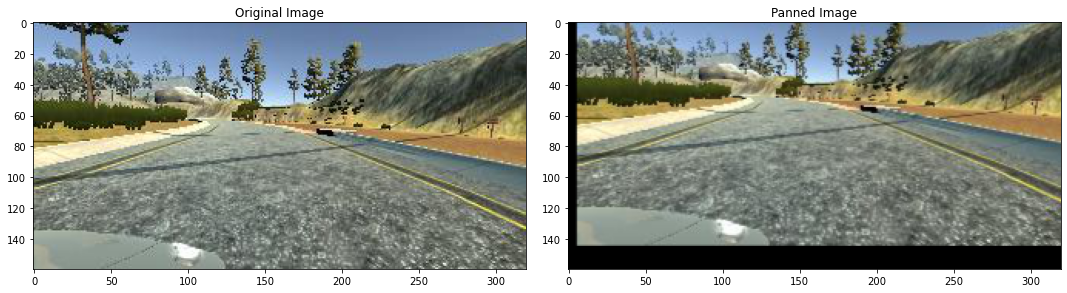

In [12]:
    image = image_paths[random.randint(0, 1000)]
    original_image = mpimg.imread(image)
    panned_image = pan(original_image)
     
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout()
     
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
     
    axs[1].imshow(panned_image)
    axs[1].set_title('Panned Image')

In [13]:
    def img_random_brightness(image):
        brightness = iaa.Multiply((0.2, 1.2))
        image = brightness.augment_image(image)
        return image

Text(0.5, 1.0, 'Brightness altered image ')

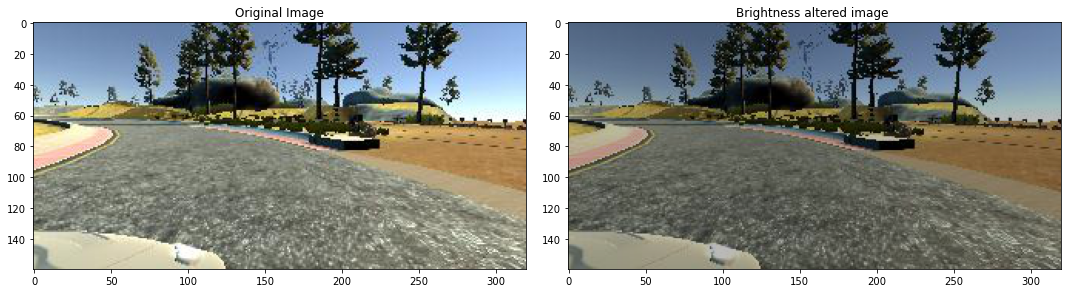

In [14]:
    image = image_paths[random.randint(0, 1000)]
    original_image = mpimg.imread(image)
    brightness_altered_image = img_random_brightness(original_image)
     
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout()
     
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
     
    axs[1].imshow(brightness_altered_image)
    axs[1].set_title('Brightness altered image ')

In [15]:
    def img_random_flip(image, steering_angle):
        image = cv2.flip(image,1)
        steering_angle = -steering_angle
        return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.15')

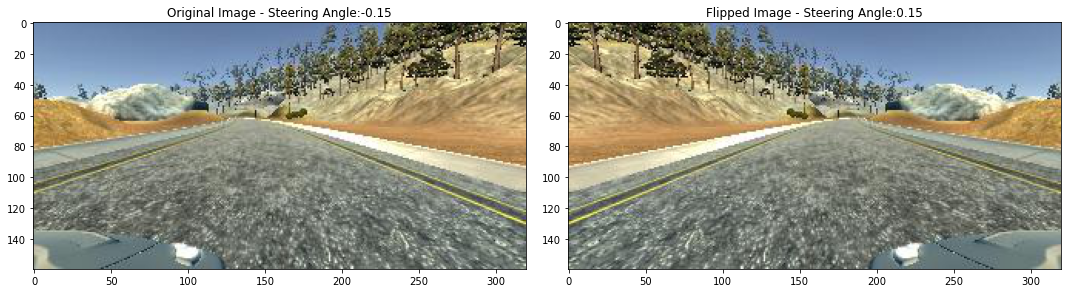

In [16]:
    random_index = random.randint(0, 1000)
    image = image_paths[random_index]
    steering_angle = steerings[random_index]
     
     
    original_image = mpimg.imread(image)
    flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
     
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout()
     
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
     
    axs[1].imshow(flipped_image)
    axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

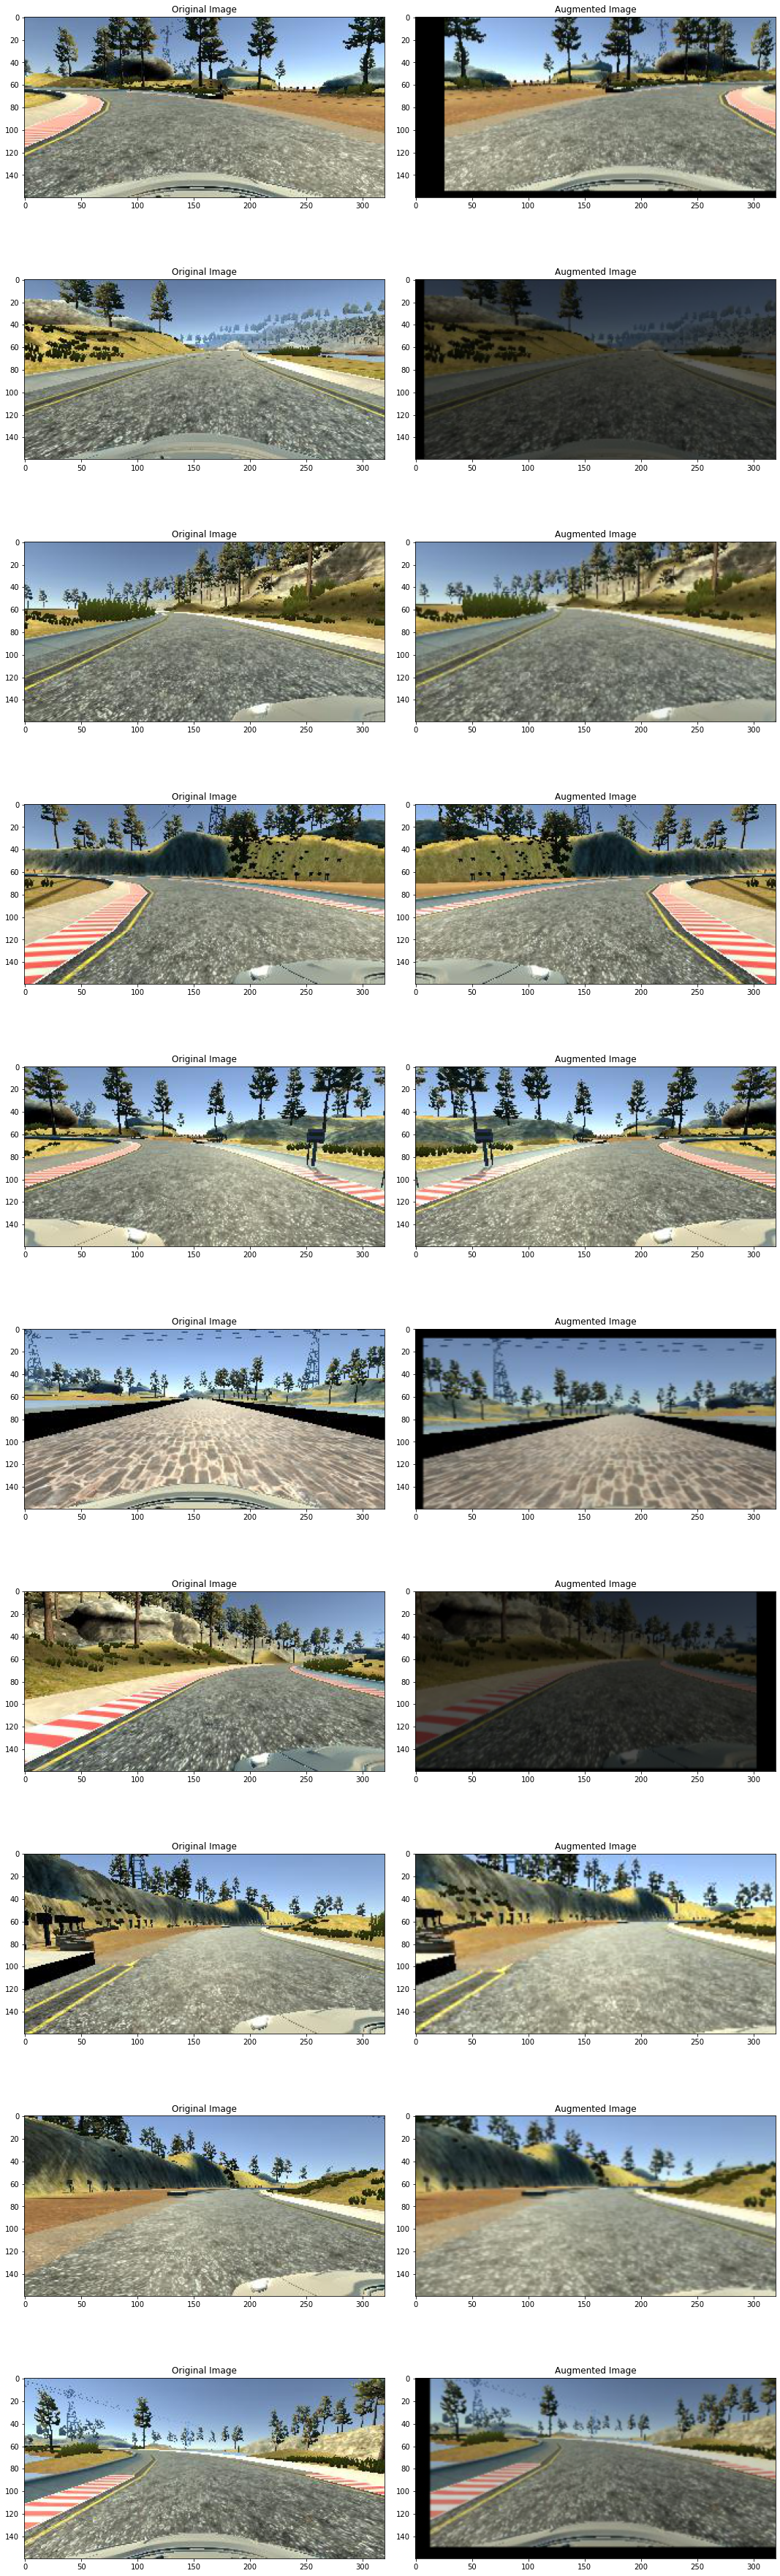

In [17]:
    def random_augment(image, steering_angle):
        image = mpimg.imread(image)
        if np.random.rand() < 0.5:
          image = pan(image)
        if np.random.rand() < 0.5:
          image = zoom(image)
        if np.random.rand() < 0.5:
          image = img_random_brightness(image)
        if np.random.rand() < 0.5:
          image, steering_angle = img_random_flip(image, steering_angle)
        
        return image, steering_angle

    ncol = 2
    nrow = 10
     
    fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
    fig.tight_layout()
     
    for i in range(10):
      randnum = random.randint(0, len(image_paths) - 1)
      random_image = image_paths[randnum]
      random_steering = steerings[randnum]
        
      original_image = mpimg.imread(random_image)
      augmented_image, steering = random_augment(random_image, random_steering)
        
      axs[i][0].imshow(original_image)
      axs[i][0].set_title("Original Image")
      
      axs[i][1].imshow(augmented_image)
      axs[i][1].set_title("Augmented Image")

In [18]:
    def img_preprocess(img):
        img = img[60:135,:,:]
        img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        img = cv2.GaussianBlur(img,  (3, 3), 0)
        img = cv2.resize(img, (200, 66))
        img = img/255
        return img

39600


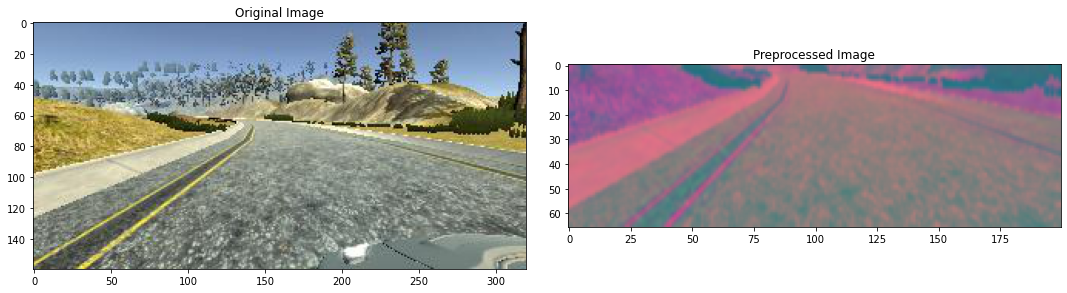

In [19]:
    image = image_paths[100]
    original_image = mpimg.imread(image)
    preprocessed_image = img_preprocess(original_image)
     
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout()
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[1].imshow(preprocessed_image)
    axs[1].set_title('Preprocessed Image')
    print(preprocessed_image.size)

In [20]:
    def batch_generator(image_paths, steering_ang, batch_size, istraining):
      
      while True:
        batch_img = []
        batch_steering = []
        
        for i in range(batch_size):
          random_index = random.randint(0, len(image_paths) - 1)
          
          if istraining:
            im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
         
          else:
            im = mpimg.imread(image_paths[random_index])
            steering = steering_ang[random_index]
          
          im = img_preprocess(im)
          batch_img.append(im)
          batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))  

Text(0.5, 1.0, 'Validation Image')

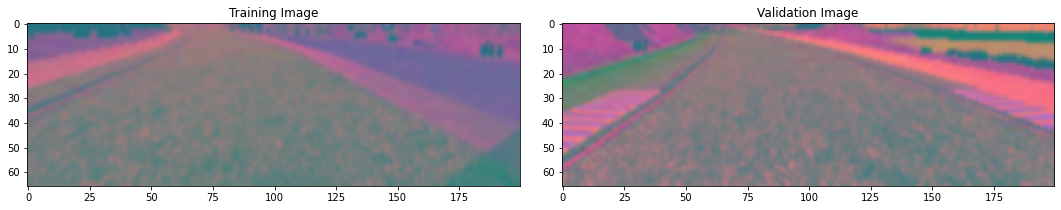

In [21]:
    x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
    x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
     
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout()
     
    axs[0].imshow(x_train_gen[0])
    axs[0].set_title('Training Image')
     
    axs[1].imshow(x_valid_gen[0])
    axs[1].set_title('Validation Image')

In [22]:
def nvidia_model():
     
    model = Sequential()
     
    model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
     
    model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
    #model.add(Dropout(0.5))
     
     
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    #model.add(Dropout(0.5))
     
     
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation ='elu'))
    model.add(Dense(1))
     
     
    optimizer= Adam(lr=1e-4)
    model.compile(loss='mse', optimizer=optimizer)
     
    return model

In [23]:
    #model = nvidia_model()
    model = load_model('model10.h5')
    print(model.summary())

    history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                      steps_per_epoch=300, 
                                      epochs=10,
                                      validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                      validation_steps=200,
                                      verbose=1,
                                      shuffle = 1)
    


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)             

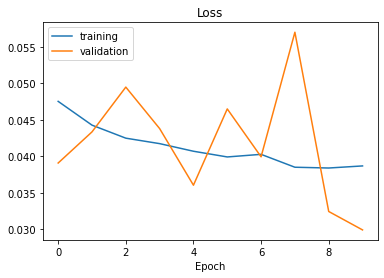

In [24]:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    plt.title('Loss')
    plt.xlabel('Epoch')
    model.save('mymade.h5')

    #from google.colab import files
    #files.download('modelsource.h5')

In [25]:
#print(model.summary())
#del model
model3 = load_model('mymade.h5')
print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              